# Analisis Genre Musik dan Hubungannya dengan Konsentrasi Belajar pada Mahasiswa

# Data Collection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Pengaruh Musik terhadap Tingkat Konsentrasi saat Belajar  (Responses) - Form Responses 1.csv")

Data dikumpulkan melalui survei online yang dibagikan dalam bentuk Google Form kepada mahasiswa kelas B27 BINUS University, Kemanggisan. Dari survey tersebut, didapatkan hasil berisi 164 respon survei mahasiswa dengan 27 fitur terkait pengaruh musik dalam proses belajar. 

Data mencakup informasi demografis, kebiasaan belajar, preferensi musik, serta persepsi responden mengenai efektivitas mendengarkan musik saat belajar. Beberapa kolom identitas (Nama Lengkap, NIM, WhatsApp) dikecualikan dari analisis untuk menjaga privasi. Dataset terdiri dari data kuantitatif (skala Likert) dan data kualitatif (jawaban terbuka), dengan sejumlah nilai kosong pada pertanyaan tentang background noise dan alasan tidak mendengarkan musik.

# Data Preparation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 27 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   Timestamp                                                                                 164 non-null    object 
 1   Saya adalah mahasiswa B27 BINUS University, Kemanggisan                                   164 non-null    object 
 2   Nama Lengkap                                                                              164 non-null    object 
 3   NIM (Nomor Induk Mahasiswa)                                                               164 non-null    int64  
 4   No. Whatsapp (untuk undian)                                                               152 non-null    float64
 5   Jenis Kelamin                                            

In [4]:
exclude = ['Nama Lengkap', 'NIM (Nomor Induk Mahasiswa)','No. Whatsapp (untuk undian)']
df.head()[[col for col in df.columns if col not in exclude]]

,Timestamp,"Saya adalah mahasiswa B27 BINUS University, Kemanggisan",Jenis Kelamin,Apakah Anda biasanya mendengarkan musik saat belajar atau mengerjakan tugas?,Apakah Anda menyarankan orang lain untuk mendengarkan musik saat belajar?,Seberapa sering Anda mendengarkan musik ketika belajar?,Seberapa banyak musik membantu konsentrasi Anda saat membaca teori?,Seberapa banyak musik membantu konsentrasi Anda saat mengerjakan tugas?,Seberapa banyak musik membantu konsentrasi Anda saat mengerjakan laporan atau paper?,Seberapa banyak musik membantu konsentrasi Anda saat belajar untuk ujian?,...,Mengapa Anda mendengarkan jenis lagu tersebut?,Musik membuat saya lebih termotivasi untuk belajar.,Musik membantu saya mempertahankan konsentrasi dalam waktu lama.,Musik membantu saya mengurangi stres saat mengerjakan tugas.,Saya lebih cepat menyelesaikan tugas jika sambil mendengarkan musik.,Efektivitas belajar dengan musik bergantung dengan mata kuliah yang sedang dipelajari.,Efektivitas belajar dengan musik bergantung dengan suasana hati.,Apa komentar atau pengalaman pribadi Anda tentang pengaruh musik dalam proses belajar?,Apakah Anda suka menggunakan background noise untuk belajar?,Kenapa Anda tidak mendengarkan musik saat belajar?
0,5/8/2025 16:21:24,Ya,Perempuan,Tidak,Tidak,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tidak,ganggu fokus
1,5/9/2025 14:47:08,Ya,Laki-laki,Ya,Ya,4.0,Membantu,Membantu,Sangat Membantu,Sangat Membantu,...,membuat belajar menyenangkan,4.0,4.0,5.0,5.0,3.0,3.0,saya suka musik,NaN,NaN
2,5/10/2025 23:14:01,Ya,Laki-laki,Ya,Ya,5.0,Sangat Membantu,Tidak mendengar musik saat mengerjakan tugas,Tidak mendengar musik saat mengerjakan laporan...,Tidak mendengar musik saat belajar untuk ujian,...,-,4.0,4.0,4.0,3.0,4.0,5.0,-,NaN,NaN
3,5/11/2025 22:40:32,Ya,Laki-laki,Ya,Ya,4.0,Sangat Mengganggu,Mengganggu,Sangat Membantu,Sangat mengganggu,...,karena saya suka,4.0,3.0,4.0,4.0,2.0,4.0,"susah belajar kalau ga mood, musik bikin mood ...",NaN,NaN
4,5/12/2025 14:08:18,Ya,Perempuan,Ya,Ya,5.0,Biasa saja,Sangat Membantu,Sangat Membantu,Membantu,...,karena pop adalah genre favorit saya,5.0,4.0,5.0,5.0,3.0,5.0,bikin tidak bosan/ngantuk,NaN,NaN


Drop kolom yang tidak digunakan

In [5]:
df = df.drop(columns=['Timestamp','No. Whatsapp (untuk undian)','Nama Lengkap','Saya adalah mahasiswa B27 BINUS University, Kemanggisan'])

**Check duplicate**

In [6]:
df.duplicated().sum()

0

**Tahap Validasi Angkatan berdasarkan NIM**

In [7]:
df['NIM (Nomor Induk Mahasiswa)'].astype(str).str[:2].value_counts()

NIM (Nomor Induk Mahasiswa)
27    161
26      2
28      1
Name: count, dtype: int64

terdapat 3 orang yang bukan merupakan B27, sehingga data responden tersebut akan dihapus

In [8]:
df = df[df['NIM (Nomor Induk Mahasiswa)'].astype(str).str.startswith('27')]
df = df.drop(columns=['NIM (Nomor Induk Mahasiswa)'])
df.shape

(161, 22)

In [9]:
df.head()

,Jenis Kelamin,Apakah Anda biasanya mendengarkan musik saat belajar atau mengerjakan tugas?,Apakah Anda menyarankan orang lain untuk mendengarkan musik saat belajar?,Seberapa sering Anda mendengarkan musik ketika belajar?,Seberapa banyak musik membantu konsentrasi Anda saat membaca teori?,Seberapa banyak musik membantu konsentrasi Anda saat mengerjakan tugas?,Seberapa banyak musik membantu konsentrasi Anda saat mengerjakan laporan atau paper?,Seberapa banyak musik membantu konsentrasi Anda saat belajar untuk ujian?,Seberapa banyak musik membantu konsentrasi Anda saat diskusi kelompok?,Saya tidak bisa belajar tanpa mendengarkan musik.,...,Mengapa Anda mendengarkan jenis lagu tersebut?,Musik membuat saya lebih termotivasi untuk belajar.,Musik membantu saya mempertahankan konsentrasi dalam waktu lama.,Musik membantu saya mengurangi stres saat mengerjakan tugas.,Saya lebih cepat menyelesaikan tugas jika sambil mendengarkan musik.,Efektivitas belajar dengan musik bergantung dengan mata kuliah yang sedang dipelajari.,Efektivitas belajar dengan musik bergantung dengan suasana hati.,Apa komentar atau pengalaman pribadi Anda tentang pengaruh musik dalam proses belajar?,Apakah Anda suka menggunakan background noise untuk belajar?,Kenapa Anda tidak mendengarkan musik saat belajar?
0,Perempuan,Tidak,Tidak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tidak,ganggu fokus
1,Laki-laki,Ya,Ya,4.0,Membantu,Membantu,Sangat Membantu,Sangat Membantu,Membantu,4.0,...,membuat belajar menyenangkan,4.0,4.0,5.0,5.0,3.0,3.0,saya suka musik,NaN,NaN
2,Laki-laki,Ya,Ya,5.0,Sangat Membantu,Tidak mendengar musik saat mengerjakan tugas,Tidak mendengar musik saat mengerjakan laporan...,Tidak mendengar musik saat belajar untuk ujian,Membantu,2.0,...,-,4.0,4.0,4.0,3.0,4.0,5.0,-,NaN,NaN
3,Laki-laki,Ya,Ya,4.0,Sangat Mengganggu,Mengganggu,Sangat Membantu,Sangat mengganggu,Tidak mendengar musik saat diskusi kelompok,1.0,...,karena saya suka,4.0,3.0,4.0,4.0,2.0,4.0,"susah belajar kalau ga mood, musik bikin mood ...",NaN,NaN
4,Perempuan,Ya,Ya,5.0,Biasa saja,Sangat Membantu,Sangat Membantu,Membantu,Tidak mendengar musik saat diskusi kelompok,5.0,...,karena pop adalah genre favorit saya,5.0,4.0,5.0,5.0,3.0,5.0,bikin tidak bosan/ngantuk,NaN,NaN


In [10]:
df_musik_ya = df[df['Apakah Anda biasanya mendengarkan musik saat belajar atau mengerjakan tugas?'] == 'Ya'].copy()
cols_for_ya = ['Jenis Kelamin'] + df.columns[df.columns.get_loc('Apakah Anda menyarankan orang lain untuk mendengarkan musik saat belajar?'):df.columns.get_loc('Apa komentar atau pengalaman pribadi Anda tentang pengaruh musik dalam proses belajar?  ') + 1].tolist()
df_musik_ya = df_musik_ya[cols_for_ya]

**Dataframe (head) yang mendengarkan musik saat belajar**

In [11]:
df_musik_ya.head()

,Jenis Kelamin,Apakah Anda menyarankan orang lain untuk mendengarkan musik saat belajar?,Seberapa sering Anda mendengarkan musik ketika belajar?,Seberapa banyak musik membantu konsentrasi Anda saat membaca teori?,Seberapa banyak musik membantu konsentrasi Anda saat mengerjakan tugas?,Seberapa banyak musik membantu konsentrasi Anda saat mengerjakan laporan atau paper?,Seberapa banyak musik membantu konsentrasi Anda saat belajar untuk ujian?,Seberapa banyak musik membantu konsentrasi Anda saat diskusi kelompok?,Saya tidak bisa belajar tanpa mendengarkan musik.,Saya lebih memilih musik tanpa lirik saat belajar dibandingkan musik dengan lirik.,Sebutkan satu genre musik yang paling sering didengarkan saat belajar!,Mengapa Anda mendengarkan jenis lagu tersebut?,Musik membuat saya lebih termotivasi untuk belajar.,Musik membantu saya mempertahankan konsentrasi dalam waktu lama.,Musik membantu saya mengurangi stres saat mengerjakan tugas.,Saya lebih cepat menyelesaikan tugas jika sambil mendengarkan musik.,Efektivitas belajar dengan musik bergantung dengan mata kuliah yang sedang dipelajari.,Efektivitas belajar dengan musik bergantung dengan suasana hati.,Apa komentar atau pengalaman pribadi Anda tentang pengaruh musik dalam proses belajar?
1,Laki-laki,Ya,4.0,Membantu,Membantu,Sangat Membantu,Sangat Membantu,Membantu,4.0,3.0,klasik,membuat belajar menyenangkan,4.0,4.0,5.0,5.0,3.0,3.0,saya suka musik
2,Laki-laki,Ya,5.0,Sangat Membantu,Tidak mendengar musik saat mengerjakan tugas,Tidak mendengar musik saat mengerjakan laporan...,Tidak mendengar musik saat belajar untuk ujian,Membantu,2.0,4.0,klasik,-,4.0,4.0,4.0,3.0,4.0,5.0,-
3,Laki-laki,Ya,4.0,Sangat Mengganggu,Mengganggu,Sangat Membantu,Sangat mengganggu,Tidak mendengar musik saat diskusi kelompok,1.0,1.0,jazz,karena saya suka,4.0,3.0,4.0,4.0,2.0,4.0,"susah belajar kalau ga mood, musik bikin mood ..."
4,Perempuan,Ya,5.0,Biasa saja,Sangat Membantu,Sangat Membantu,Membantu,Tidak mendengar musik saat diskusi kelompok,5.0,1.0,pop,karena pop adalah genre favorit saya,5.0,4.0,5.0,5.0,3.0,5.0,bikin tidak bosan/ngantuk
6,Laki-laki,Tidak,3.0,Sangat Membantu,Sangat Membantu,Sangat Membantu,Sangat Membantu,Sangat Membantu,4.0,3.0,slow rock,suka dengan genrenya,4.0,2.0,4.0,3.0,4.0,2.0,sesuai dengan konteks


In [12]:
df_musik_ya.shape

(129, 19)

Berdasarkan data yang diperoleh, dari 161 sampel yang dikumpulkan, terdapat 32 orang yang tidak terbiasa mendengarkan musik saat belajar. Dengan demikian, penilaian hanya dilakukan terhadap 129 sampel yang relevan.

In [13]:
df_musik_ya.isna().sum()

Jenis Kelamin                                                                               0
Apakah Anda menyarankan orang lain untuk mendengarkan musik saat belajar?                   0
Seberapa sering Anda mendengarkan musik ketika belajar?                                     0
Seberapa banyak musik membantu konsentrasi Anda saat membaca teori?                         0
Seberapa banyak musik membantu konsentrasi Anda saat mengerjakan tugas?                     0
Seberapa banyak musik membantu konsentrasi Anda saat mengerjakan laporan atau paper?        0
Seberapa banyak musik membantu konsentrasi Anda saat belajar untuk ujian?                   0
Seberapa banyak musik membantu konsentrasi Anda saat diskusi kelompok?                      0
Saya tidak bisa belajar tanpa mendengarkan musik.                                           0
Saya lebih memilih musik tanpa lirik saat belajar dibandingkan musik dengan lirik.          0
Sebutkan satu genre musik yang paling sering didengarkan saa

In [14]:
categorical_cols_ya = df_musik_ya.select_dtypes(include='object').columns
numerical_cols_ya = df_musik_ya.select_dtypes(include=['int64','float64']).columns

print("Categorical variable pada orang yang mendengarkan musik saat belajar:\n", categorical_cols_ya)
print("\nNumerical variable pada orang yang mendengarkan musik saat belajar:\n", numerical_cols_ya)

Categorical variable pada orang yang mendengarkan musik saat belajar:
 Index(['Jenis Kelamin',
       'Apakah Anda menyarankan orang lain untuk mendengarkan musik saat belajar?',
       'Seberapa banyak musik membantu konsentrasi Anda saat membaca teori?',
       'Seberapa banyak musik membantu konsentrasi Anda saat mengerjakan tugas?',
       'Seberapa banyak musik membantu konsentrasi Anda saat mengerjakan laporan atau paper?',
       'Seberapa banyak musik membantu konsentrasi Anda saat belajar untuk ujian?',
       'Seberapa banyak musik membantu konsentrasi Anda saat diskusi kelompok?',
       'Sebutkan satu genre musik yang paling sering didengarkan saat belajar!',
       'Mengapa Anda mendengarkan jenis lagu tersebut?',
       'Apa komentar atau pengalaman pribadi Anda tentang pengaruh musik dalam proses belajar?  '],
      dtype='object')

Numerical variable pada orang yang mendengarkan musik saat belajar:
 Index(['Seberapa sering Anda mendengarkan musik ketika belajar?',
     

In [15]:
hyphen_counts = {}
for col in categorical_cols_ya:
    count = (df_musik_ya[col] == '-').sum()
    if count > 0:
        hyphen_counts[col] = count

for col, count in hyphen_counts.items():
    print(f"'{col}': {count} hyphens ('-')")

'Sebutkan satu genre musik yang paling sering didengarkan saat belajar!': 1 hyphens ('-')
'Mengapa Anda mendengarkan jenis lagu tersebut?': 4 hyphens ('-')
'Apa komentar atau pengalaman pribadi Anda tentang pengaruh musik dalam proses belajar?  ': 18 hyphens ('-')


# EDA

EDA ini hanya mencakup close-ended questions.  Open-ended questions akan dianalisis setelah dilakukan preprocessing.

## Distribusi Gender

Text(0.5, 1.0, 'Distribusi Jenis Kelamin')

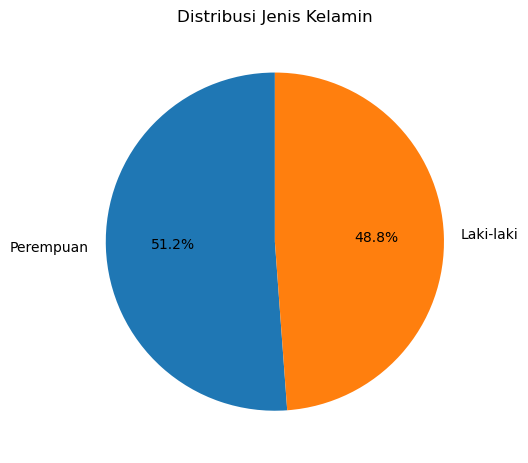

In [16]:
gender_counts_ya = df_musik_ya['Jenis Kelamin'].value_counts()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(gender_counts_ya, labels=gender_counts_ya.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Jenis Kelamin')

Perbedaan proporsi gender di sangat kecil (kurang dari 5%), yang berarti distribusi jenis kelamin cukup seimbang di antara keduanya. Tidak ada kecenderungan kuat bahwa salah satu gender lebih dominan dalam preferensi mendengarkan atau tidak mendengarkan musik saat belajar.

## Kebiasaan Mendengarkan Musik Saat Belajar

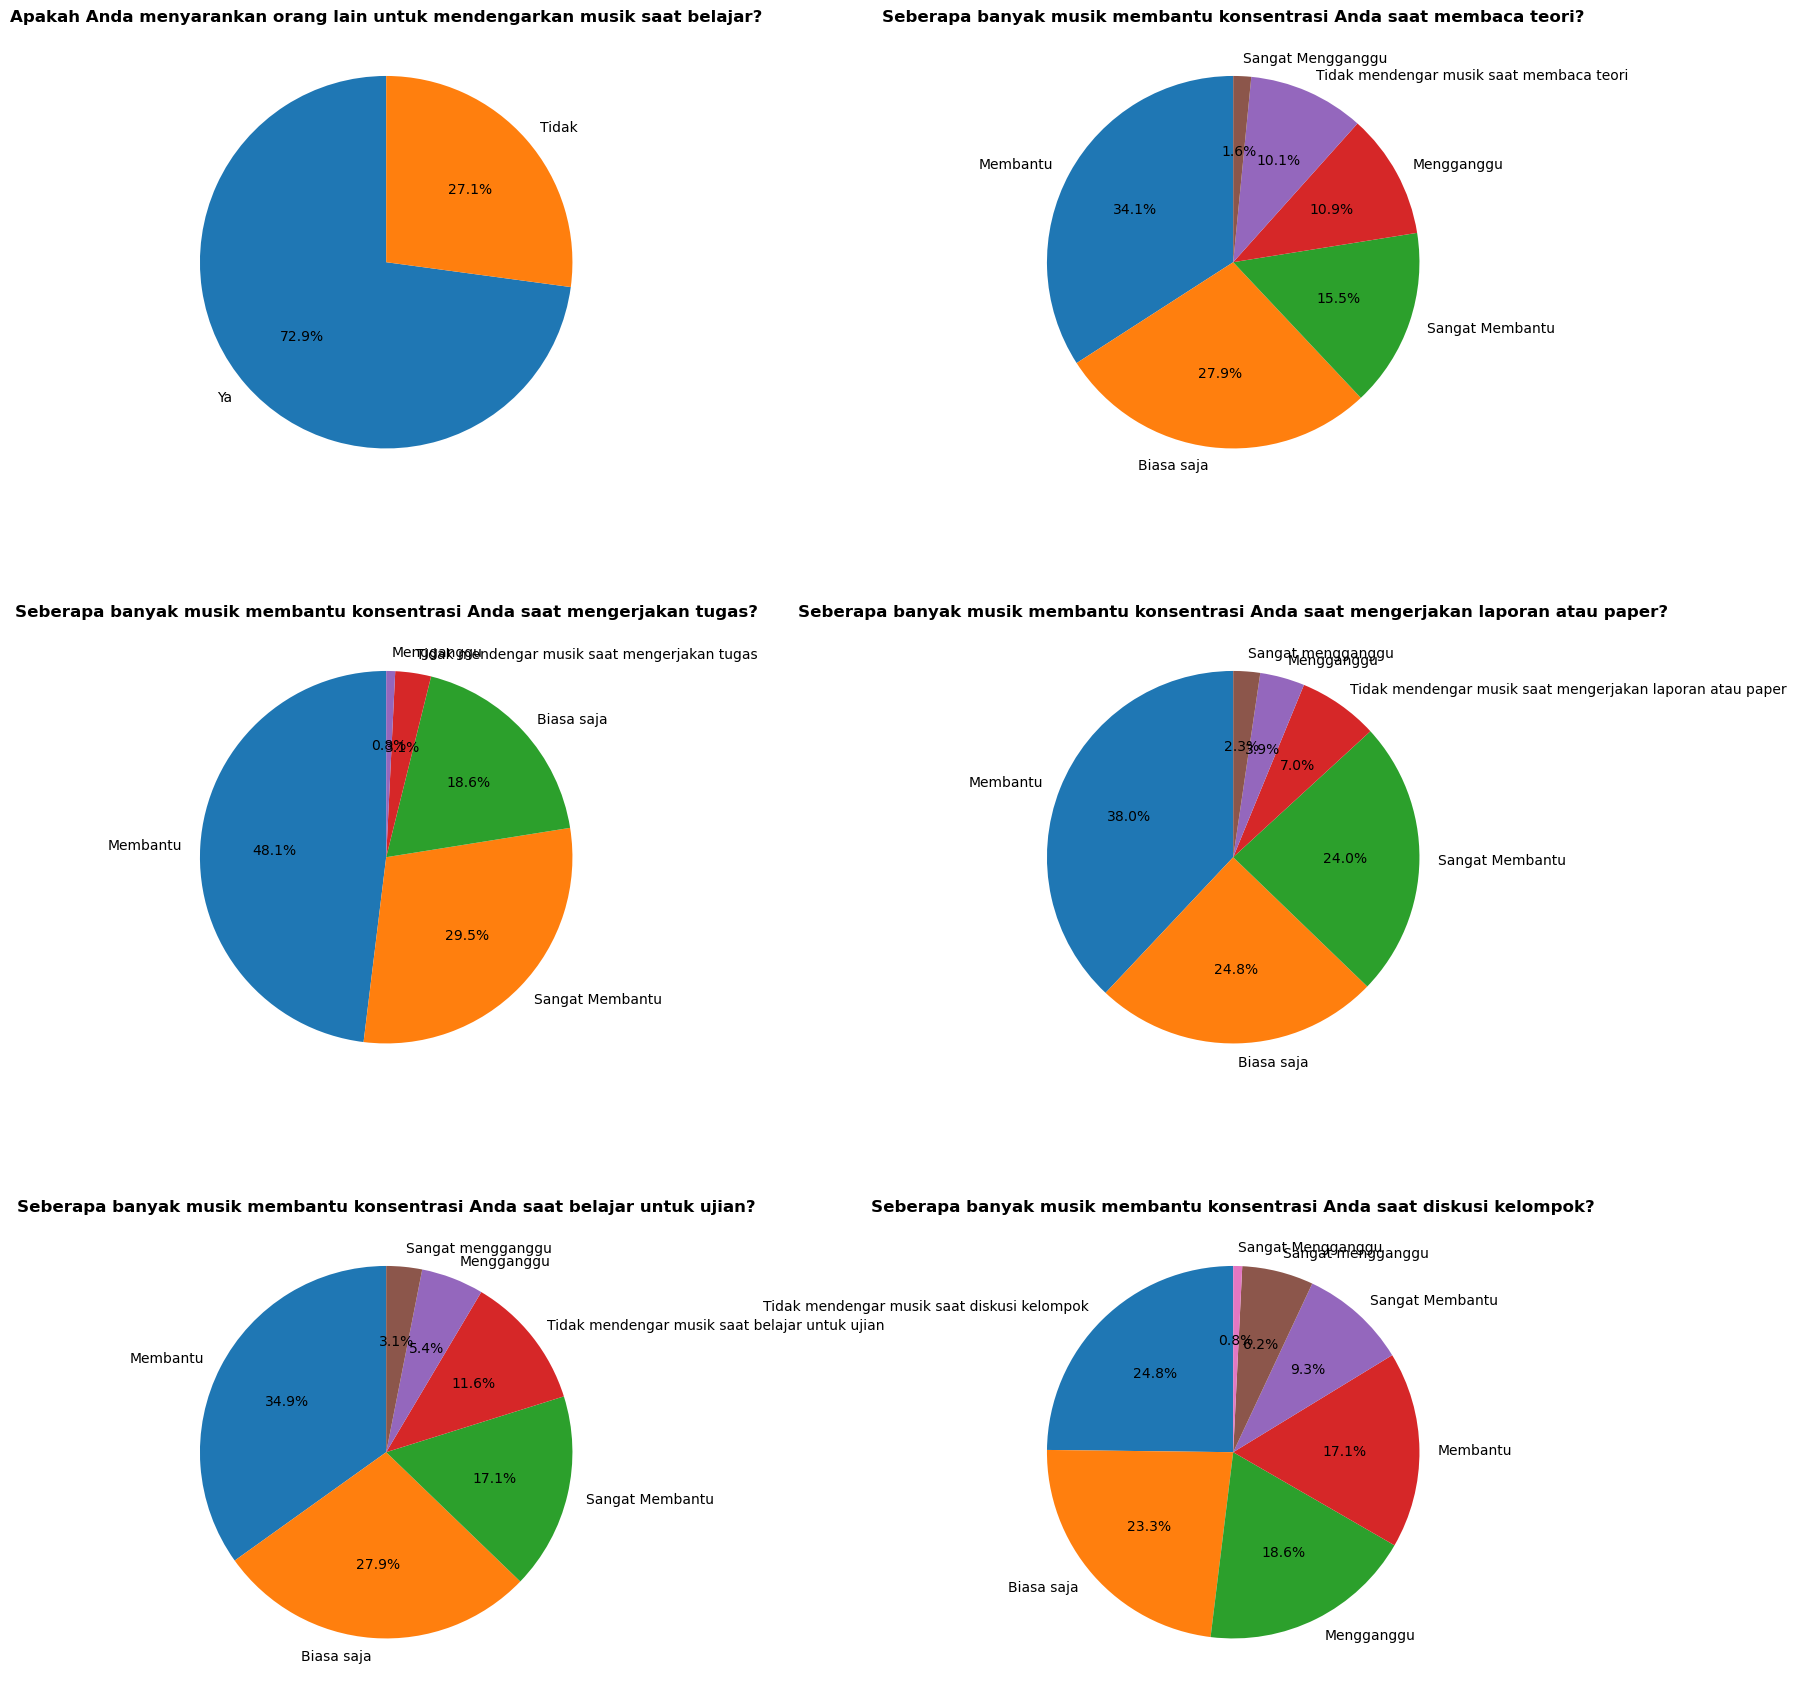

In [17]:
cols_to_exclude = [
    'Jenis Kelamin',
    'Sebutkan satu genre musik yang paling sering didengarkan saat belajar!',
    'Mengapa Anda mendengarkan jenis lagu tersebut?',
    'Apa komentar atau pengalaman pribadi Anda tentang pengaruh musik dalam proses belajar?  '
]
categorical_cols_for_plotting = [col for col in categorical_cols_ya if col not in cols_to_exclude]

num_cols = len(categorical_cols_for_plotting)
num_rows = (num_cols + 1) // 2
plt.figure(figsize=(16, num_rows * 6))

for i, col in enumerate(categorical_cols_for_plotting, 1):
    plt.subplot(num_rows, 2, i)
    value_counts = df_musik_ya[col].value_counts()

    wedges, texts, autotexts = plt.pie(
        value_counts,
        labels=value_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 10}
    )
    
    plt.title(col, fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

Insights:
* Mayoritas responden (72,9%) yang mendengarkan musik saat belajar juga merekomendasikan orang lain untuk melakukan hal yang sama.
* Mayoritas responden merasa musik membantu konsentrasi belajar, terutama saat mengerjakan tugas dan laporan. Namun untuk diskusi kelompok hasilnya lebih beragam, yaitu ada yang terbantu, ada juga yang terganggu.

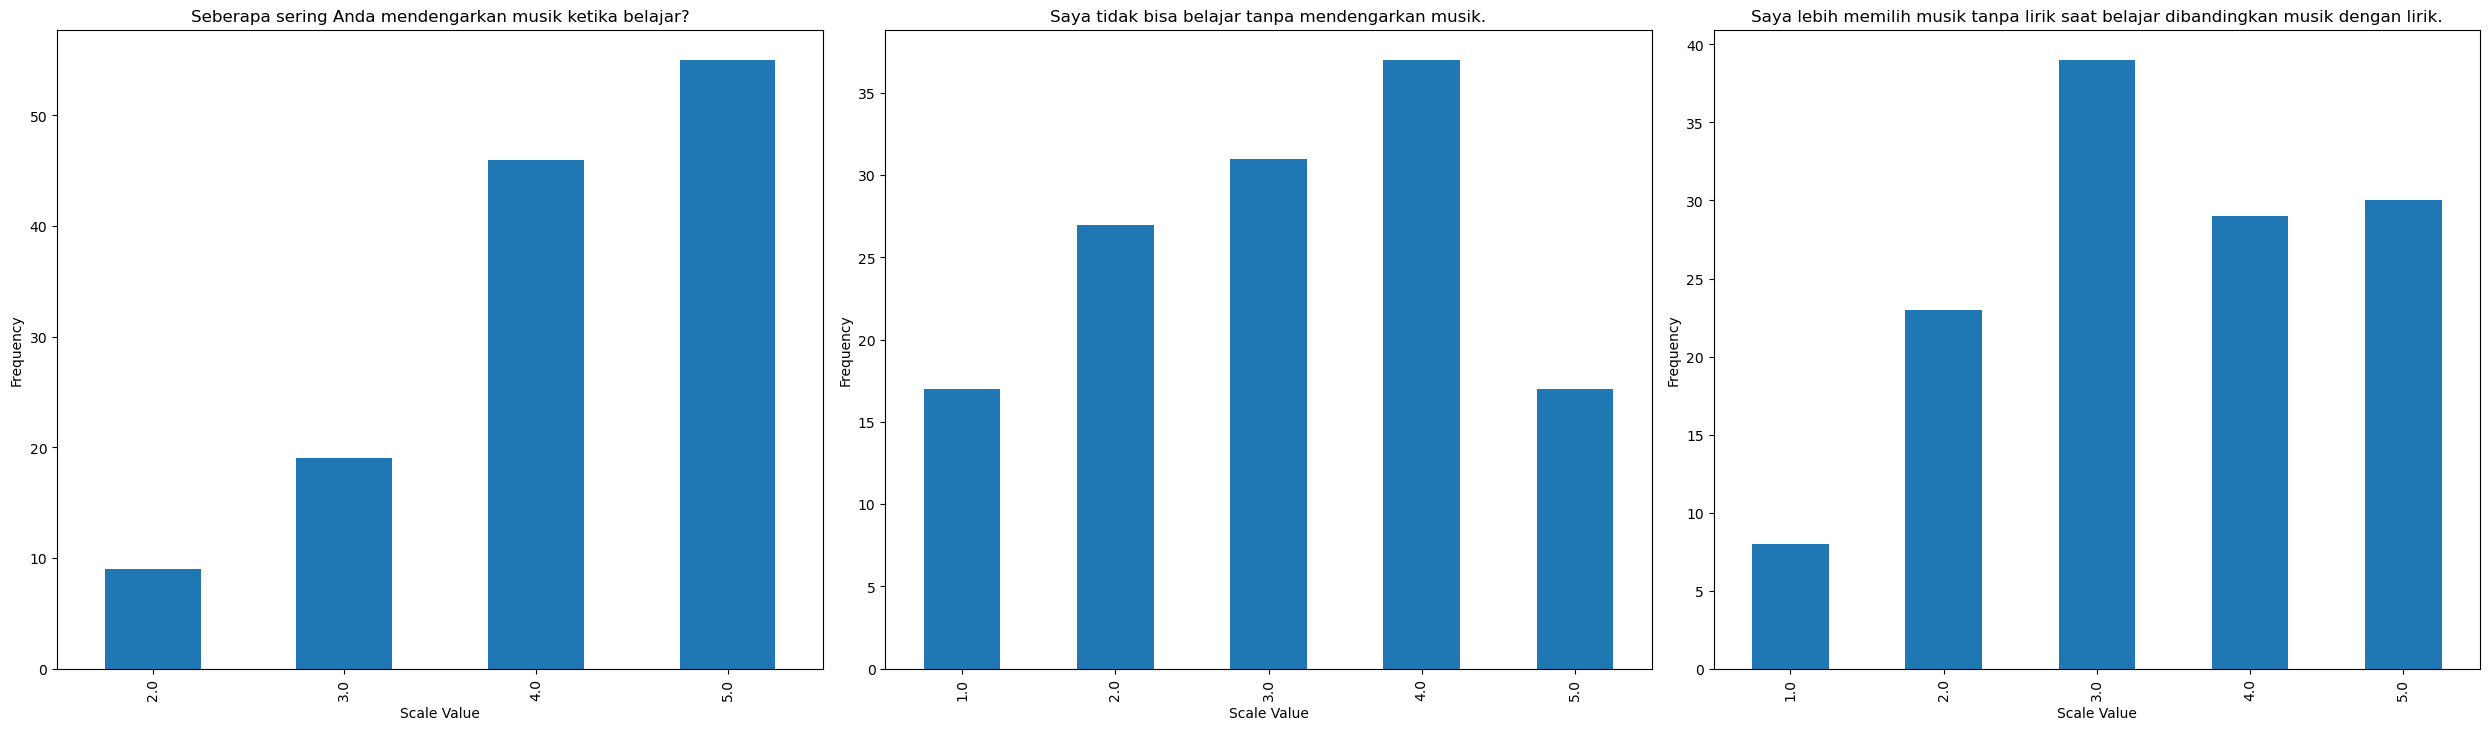

In [18]:
selected_cols = numerical_cols_ya[:3]
num_cols = len(selected_cols)

plt.figure(figsize=(25,21))
for i, col in enumerate(selected_cols, start = 1):
    plt.subplot(3,3,i)
    count = df_musik_ya[col].value_counts().sort_index()
    count.plot(kind='bar')
    plt.title(col)
    plt.xlabel('Scale Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Insights:
* Responden sering mendengarkan musik ketika belajar.
* Musik membantu fokus, meski tidak semua merasa benar-benar bergantung.
* Ada kecenderungan lebih banyak yang memilih musik tanpa lirik saat belajar.

In [19]:
df_musik_ya['Sebutkan satu genre musik yang paling sering didengarkan saat belajar!'].value_counts()

Sebutkan satu genre musik yang paling sering didengarkan saat belajar!
pop                       31
jazz                      17
lofi                      10
klasik                     7
instrumental               7
kpop                       4
Pop                        3
acoustic                   2
lo-fi                      2
classic                    2
indie rock                 2
edm                        2
rnb                        2
japanese jazz              2
Classic                    1
klasik dan rnb             1
acoustic guitar            1
cpop                       1
background music           1
alternative rock           1
anisong                    1
pop modern                 1
indie pop                  1
tidak ada                  1
jpop                       1
tidak ada genre khusus     1
ost                        1
dangdut                    1
house                      1
gamelan bali               1
alternative                1
soft electric              1
j

Terlihat banyak duplikasi bentuk penulisan, perlu preprocessing/normalisasi agar analisis lebih representatif.

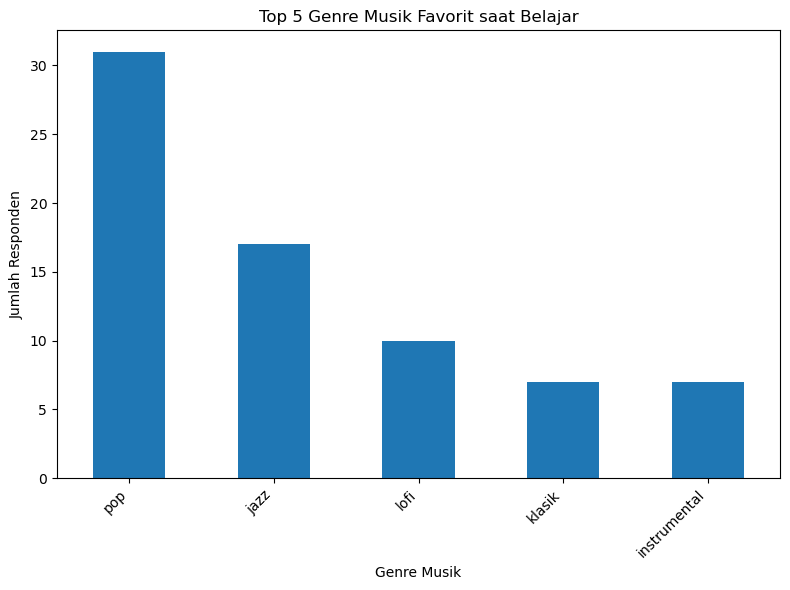

In [20]:
genre_col = 'Sebutkan satu genre musik yang paling sering didengarkan saat belajar!'
if genre_col in df_musik_ya.columns:
    genre_counts = df_musik_ya[genre_col].value_counts()

    top_5_genres = genre_counts.head(5)

    plt.figure(figsize=(8, 6))
    top_5_genres.plot(kind='bar')
    plt.title('Top 5 Genre Musik Favorit saat Belajar')
    plt.xlabel('Genre Musik')
    plt.ylabel('Jumlah Responden')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print(f"Column '{genre_col}' not found in df_musik_ya.")

## Pengaruh Musik terhadap Efektivitas Belajar

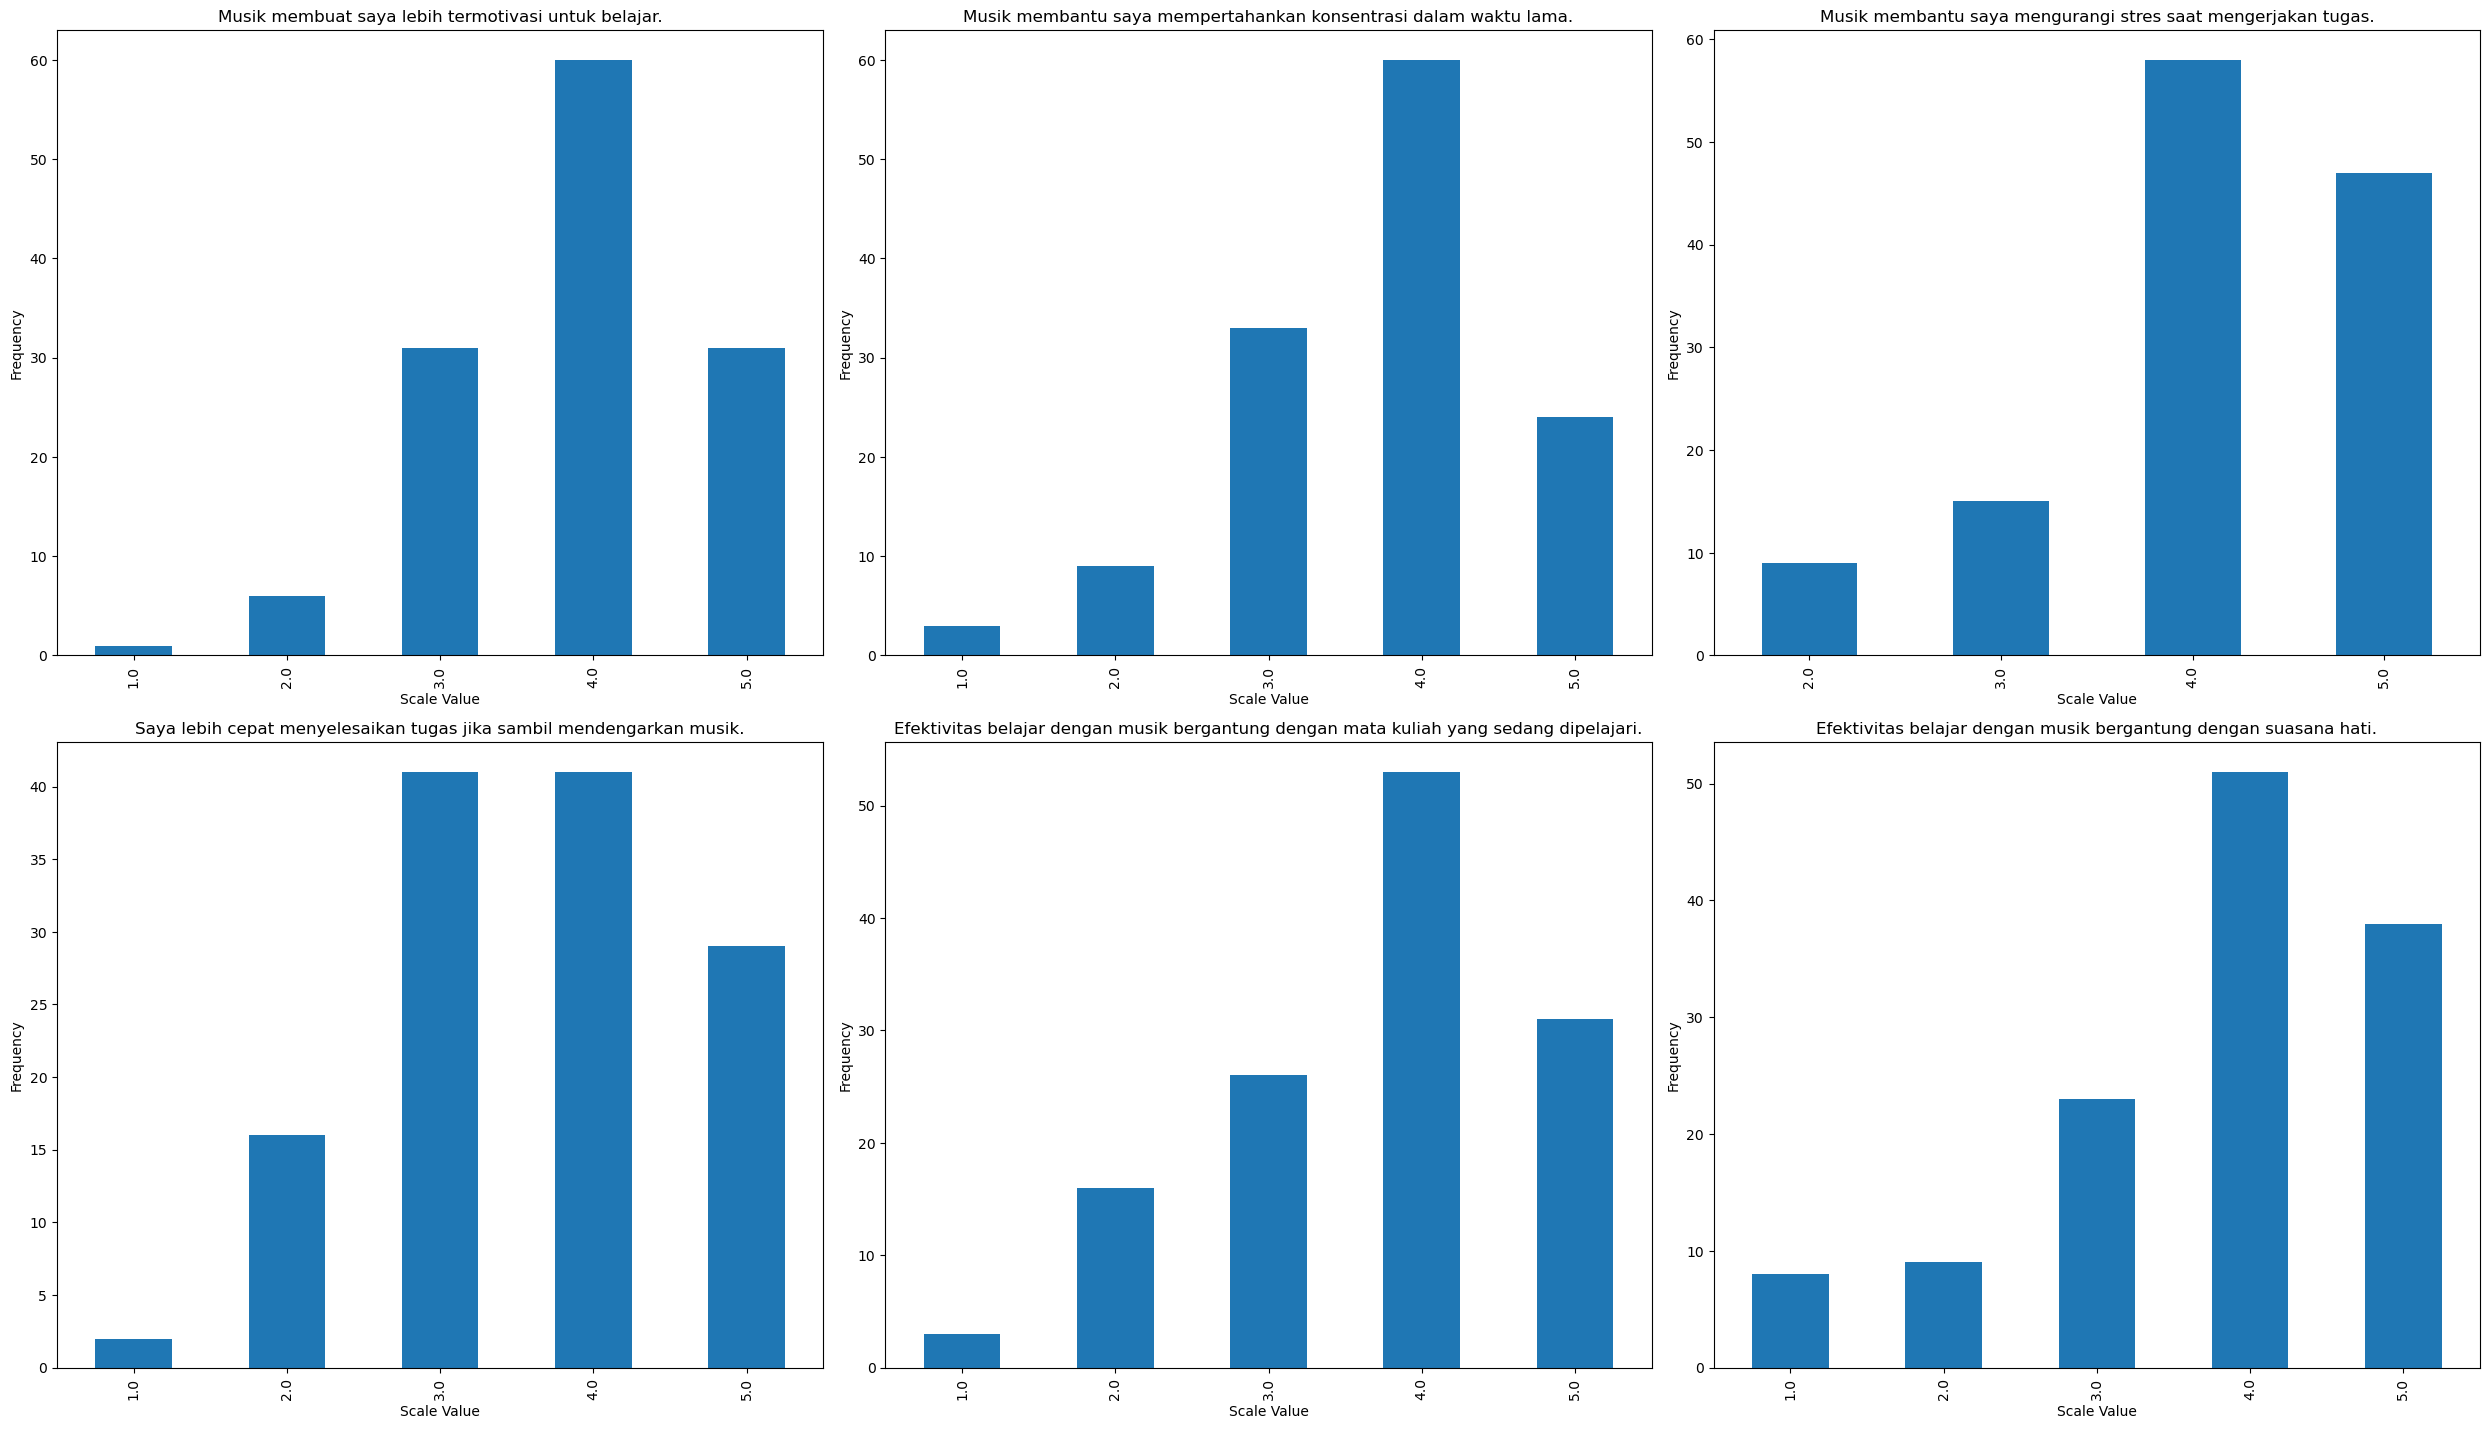

In [21]:
selected_cols = numerical_cols_ya[3:]
num_cols = len(selected_cols)

plt.figure(figsize=(25,21))
for i, col in enumerate(selected_cols, start = 1):
    plt.subplot(3,3,i)
    count = df_musik_ya[col].value_counts().sort_index()
    count.plot(kind='bar')
    plt.title(col)
    plt.xlabel('Scale Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

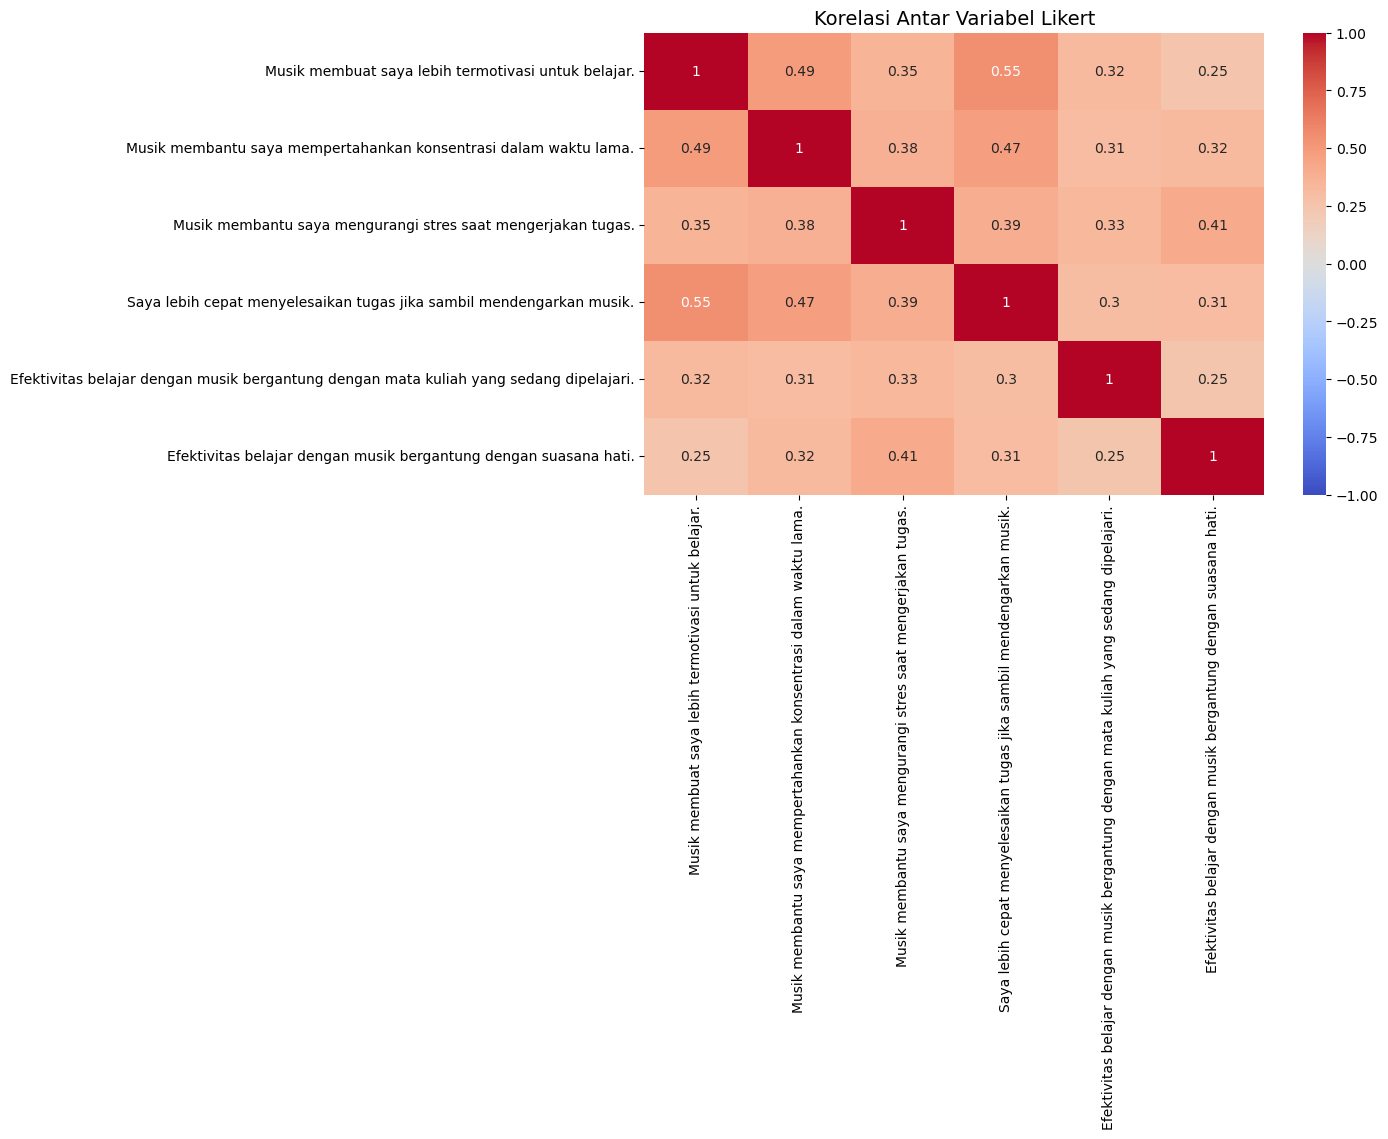

In [22]:
df_selected = df_musik_ya[selected_cols]
corr = df_selected.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Korelasi Antar Variabel Likert", fontsize=14)
plt.show()

Hasil EDA menunjukkan bahwa musik berperan penting dalam mendukung proses belajar mahasiswa. Mayoritas responden setuju bahwa musik meningkatkan motivasi, menjaga konsentrasi, mengurangi stres, serta mempercepat penyelesaian tugas. Dua faktor utama yang menonjol adalah:
* Motivasi: berkorelasi kuat dengan kecepatan menyelesaikan tugas (0.55) dan konsentrasi (0.49), sehingga menjadi penghubung utama antara musik dan produktivitas akademik.
* Pengurangan stres: berkorelasi dengan suasana hati (0.41), menunjukkan peran musik dalam menciptakan kondisi emosional yang lebih stabil saat belajar.

Faktor kontekstual seperti jenis mata kuliah dan suasana hati memang berpengaruh, tetapi korelasinya lebih rendah (0.25–0.33). Dengan demikian, faktor psikologis seperti motivasi dan stres terbukti lebih konsisten dibanding faktor kontekstual.

# Text Preprocessing

In [23]:
import re, string
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [24]:
stopwords_id = set(stopwords.words("indonesian"))

In [25]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    tokens = text.split()
    tokens = [t for t in tokens if t not in stopwords_id]
    return " ".join(tokens)

In [26]:
kolom_teks_ya = [
    "Mengapa Anda mendengarkan jenis lagu tersebut?",
    "Apa komentar atau pengalaman pribadi Anda tentang pengaruh musik dalam proses belajar?  "
]

for col in kolom_teks_ya:
    df_musik_ya[col] = df_musik_ya[col].astype(str).apply(clean_text)

In [27]:
def normalize_genre(text):
    text = str(text).lower().strip()
    if text in ['pop','Genre pop','pop modern','soft pop','c-pop','cpop','j-pop','jpop','J-POP','kpop','Genre Pop', 'Pop Rnb']:
        return 'Pop'
    elif text in ['jazz','japanese jazz']:
        return 'Jazz'
    elif text in ['lofi','lo-fi']:
        return 'Lofi'
    elif text in ['klasik','classic','classical','Classic','klasik dan rnb']:
        return 'Klasik'
    elif text in ['instrumental','orchestra']:
        return 'Instrumental'
    elif text in ['rnb','rnb asia']:
        return 'R&B'
    elif text in ['rock','alternative rock','slow rock']:
        return 'Rock'
    elif text in ['acoustic','acoustic guitar','akustik']:
        return 'Acoustic'
    elif text in ['edm','electronic','house','soft electric']:
        return 'EDM'
    elif text in ['indie pop','alternative','indie rock']:
        return 'Indie/Alternative'
    else:
        return 'Lainnya'


df_musik_ya['Sebutkan satu genre musik yang paling sering didengarkan saat belajar!'] = df_musik_ya['Sebutkan satu genre musik yang paling sering didengarkan saat belajar!'].apply(normalize_genre)
df_musik_ya['Sebutkan satu genre musik yang paling sering didengarkan saat belajar!'].value_counts()

Sebutkan satu genre musik yang paling sering didengarkan saat belajar!
Pop                  45
Jazz                 19
Klasik               13
Lofi                 13
Lainnya              13
Instrumental          8
EDM                   5
Acoustic              4
Indie/Alternative     4
R&B                   3
Rock                  2
Name: count, dtype: int64

# Uji Statistik (Genre & Konsentrasi)

In [28]:
import scipy.stats as stats

In [29]:
df_musik_ya.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129 entries, 1 to 163
Data columns (total 19 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   Jenis Kelamin                                                                             129 non-null    object 
 1   Apakah Anda menyarankan orang lain untuk mendengarkan musik saat belajar?                 129 non-null    object 
 2   Seberapa sering Anda mendengarkan musik ketika belajar?                                   129 non-null    float64
 3   Seberapa banyak musik membantu konsentrasi Anda saat membaca teori?                       129 non-null    object 
 4   Seberapa banyak musik membantu konsentrasi Anda saat mengerjakan tugas?                   129 non-null    object 
 5   Seberapa banyak musik membantu konsentrasi Anda saat mengerjak

In [30]:
genre = df_musik_ya.iloc[:,10]
konsentrasi = pd.to_numeric(df_musik_ya.iloc[:,13], errors="coerce")
data_genre = pd.DataFrame({"Genre": genre, "Konsentrasi": konsentrasi})
data_genre.value_counts()

Genre              Konsentrasi
Pop                4.0            22
                   3.0            13
Klasik             4.0            10
Jazz               4.0             9
Pop                5.0             7
Lofi               4.0             6
                   5.0             5
Lainnya            4.0             5
                   3.0             5
Jazz               3.0             5
Instrumental       3.0             3
Jazz               5.0             3
Acoustic           4.0             2
Lainnya            2.0             2
Klasik             3.0             2
Acoustic           5.0             2
Pop                2.0             2
Instrumental       4.0             2
Indie/Alternative  5.0             2
                   3.0             2
EDM                5.0             2
R&B                4.0             2
Lofi               3.0             2
Pop                1.0             1
R&B                5.0             1
Rock               2.0             1
Klasik 

In [31]:
groups = [group["Konsentrasi"].values for name, group in data_genre.groupby("Genre")]
stat, p = stats.kruskal(*groups)
print("Hasil Kruskal-Wallis Test:")
print("Statistik =", stat, ", p-value =", p)

if p < 0.05:
    print("Terdapat perbedaan signifikan tingkat konsentrasi antar genre musik.")
else:
    print("Tidak ditemukan perbedaan signifikan antar genre.")

Hasil Kruskal-Wallis Test:
Statistik = 14.797186195929083 , p-value = 0.13963289423540837
Tidak ditemukan perbedaan signifikan antar genre.


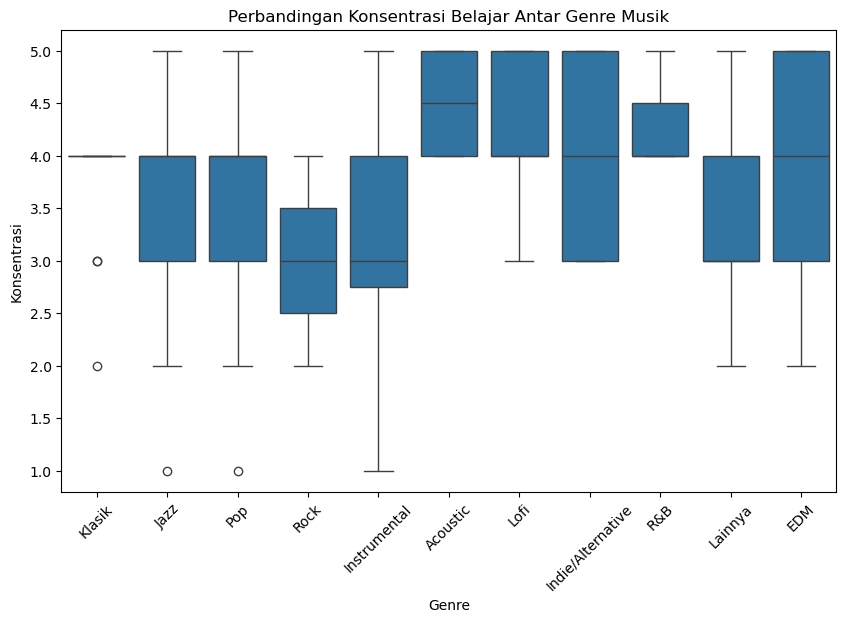

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Genre", y="Konsentrasi", data=data_genre)
plt.xticks(rotation=45)
plt.title("Perbandingan Konsentrasi Belajar Antar Genre Musik")
plt.show()

Musik dari berbagai genre umumnya membantu konsentrasi, tetapi perbedaan antar genre tidak signifikan (bernilai lebih dari 0.05) secara statistik. Hal ini kemungkinan dipengaruhi oleh keterbatasan data, sehingga kekuatan analisis statistik menjadi terbatas.

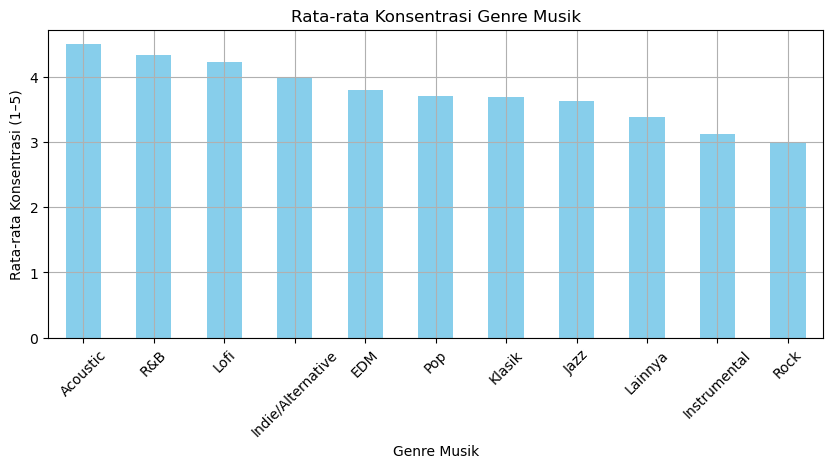

In [33]:
genre_conc = (
    df_musik_ya[df_musik_ya.iloc[:,10].isin(genre)]
    .groupby(genre)["Musik membantu saya mempertahankan konsentrasi dalam waktu lama."]
    .mean().sort_values(ascending=False)
)

plt.figure(figsize=(10,4))
genre_conc.plot(kind="bar", color="skyblue")
plt.ylabel("Rata-rata Konsentrasi (1–5)")
plt.xlabel("Genre Musik")
plt.title("Rata-rata Konsentrasi Genre Musik")
plt.xticks(rotation=45)
plt.grid()
plt.show()

Berdasarkan hasil bar plot, dapat diketahui bahwa responden yang mendengarkan musik genre Acoustic, R&B, dan Lofi cenderung memiliki rata-rata konsentrasi lebih tinggi (> 4.0) saat belajar dibandingkan genre lainnya.

Meskipun musik dari berbagai genre umumnya membantu konsentrasi, perbedaan rata-rata tersebut tidak signifikan secara statistik (p value > 0.1). Hal ini kemungkinan dipengaruhi oleh keterbatasan data dan ketidakseimbangan jumlah responden antar genre, sehingga kekuatan analisis statistik menjadi terbatas.

# Text Analysis

## Alasan Mendengarkan Genre Tersebut Saat Belajar (Top 5 Genre)

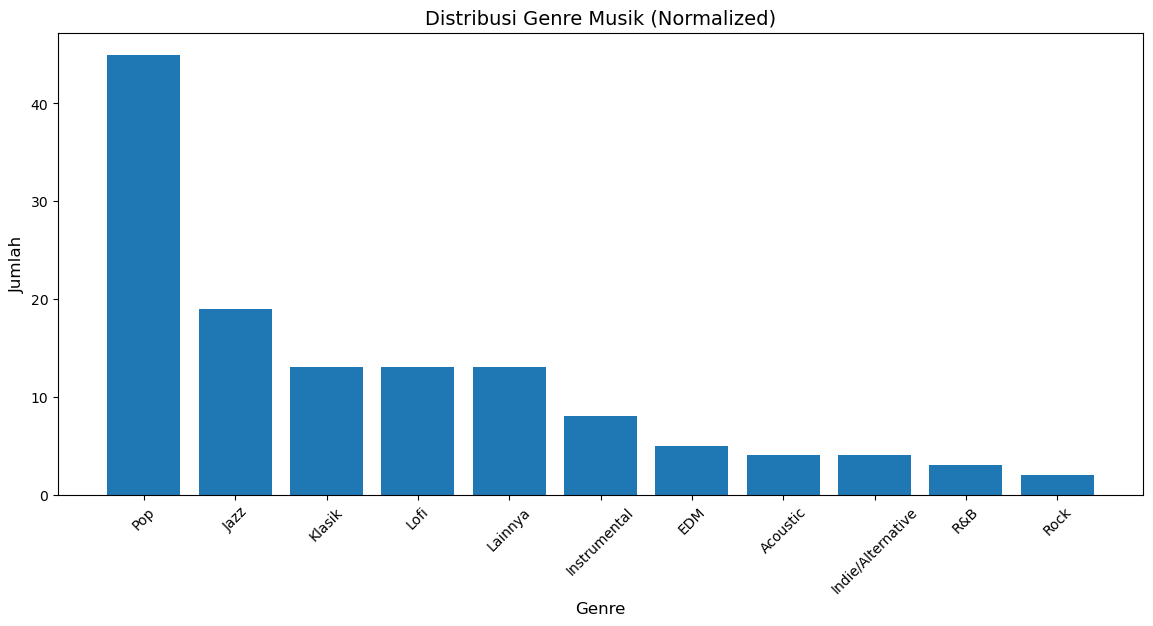

In [34]:
genre_counts = genre.value_counts()

plt.figure(figsize=(14,6))
plt.bar(genre_counts.index, genre_counts.values)
plt.title("Distribusi Genre Musik (Normalized)", fontsize=14)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Jumlah", fontsize=12)
plt.xticks(rotation=45)

plt.show()

In [35]:
genre_counts

Sebutkan satu genre musik yang paling sering didengarkan saat belajar!
Pop                  45
Jazz                 19
Klasik               13
Lofi                 13
Lainnya              13
Instrumental          8
EDM                   5
Acoustic              4
Indie/Alternative     4
R&B                   3
Rock                  2
Name: count, dtype: int64

Berdasarkan hasil di atas dapat diketahui bahwa genre musik yang paling sering didengarkan mahasiswa ketika belajar adalah: 
* Pop (45)
* Jazz (19)
* Klasik (13)
* Lofi (13)
* Instrumental (8)

In [36]:
top5 = ["Pop", "Jazz", "Lofi", "Klasik", "Instrumental"]

### Wordcloud

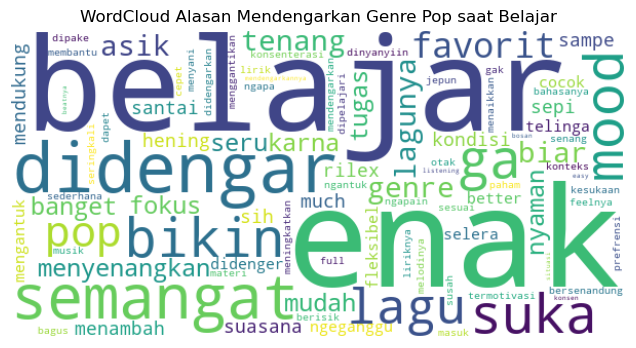

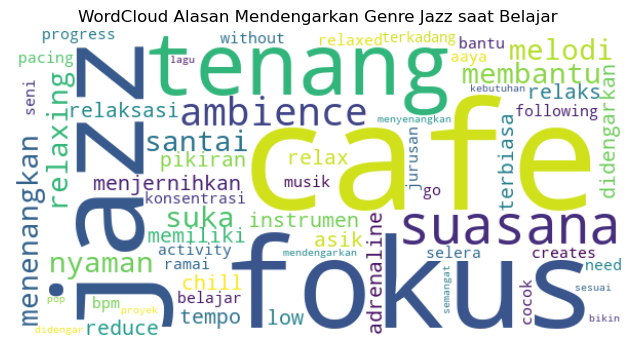

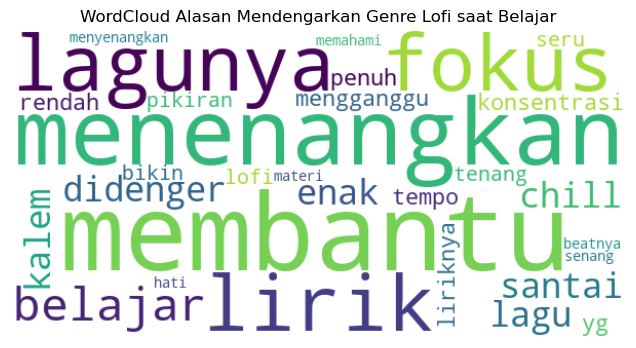

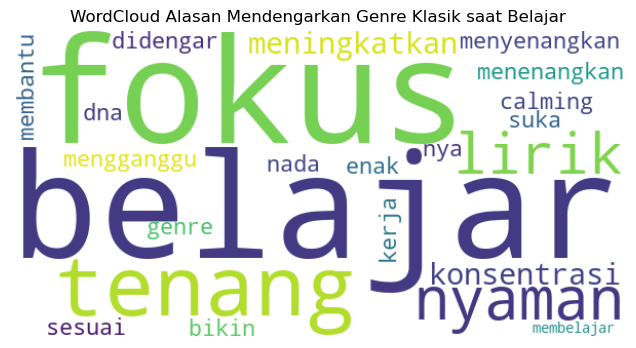

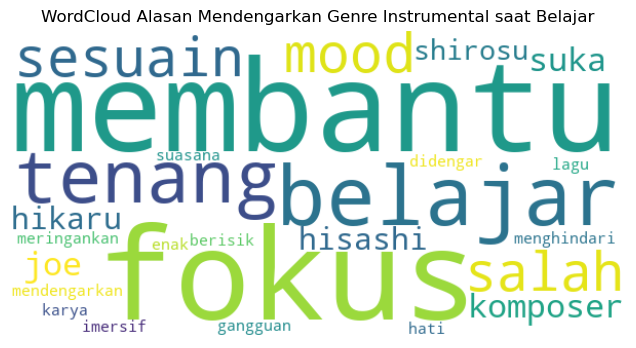

In [37]:
for g in top5:
    text = " ".join(df_musik_ya[genre == g]["Mengapa Anda mendengarkan jenis lagu tersebut?"].dropna())
    if text.strip():
        wc = WordCloud(width=600, height=300, background_color="white").generate(text)
        plt.figure(figsize=(8,4))
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"WordCloud Alasan Mendengarkan Genre {g} saat Belajar")
        plt.show()

Dari hasil wordcloud di atas, dapat diketahui kata dominan pada setiap genre sebagai berikut.
* Pop: belajar, enak, didengar, tenang, semangat, mood, suka
* Jazz: fokus, cafe, tenang, ambience, suasana, menenangkan, santai
* Lofi: membantu, menenangkan, lirik, fokus, belajar, chill
* Klasik: fokus, belajar, tenang, nyaman, lirik, konsentrasi
* Instrumental: membantu, fokus, belajar, tenang, komposer, mood

### Bigram/Trigram with TF-IDF

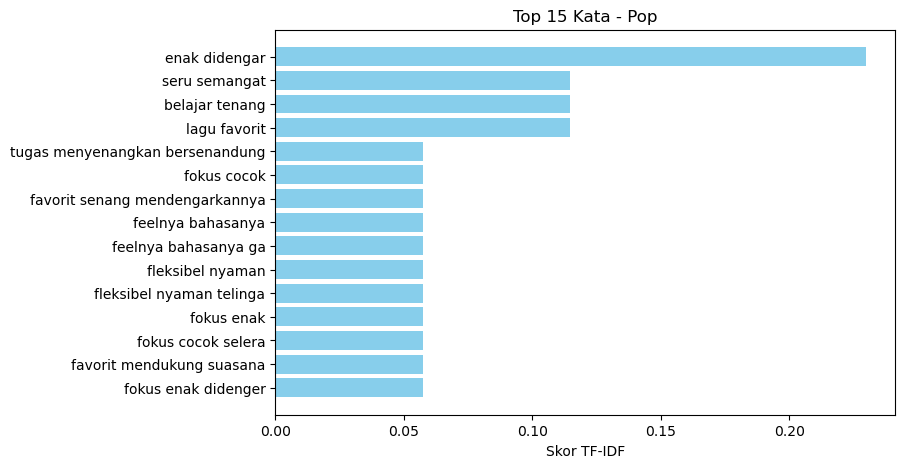

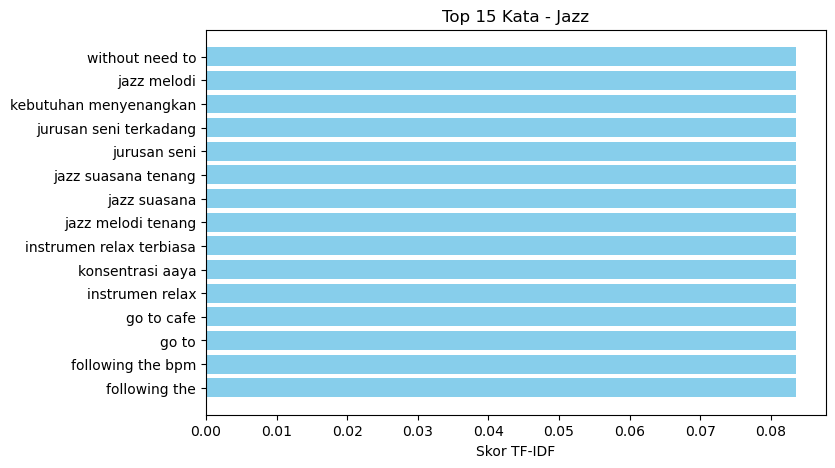

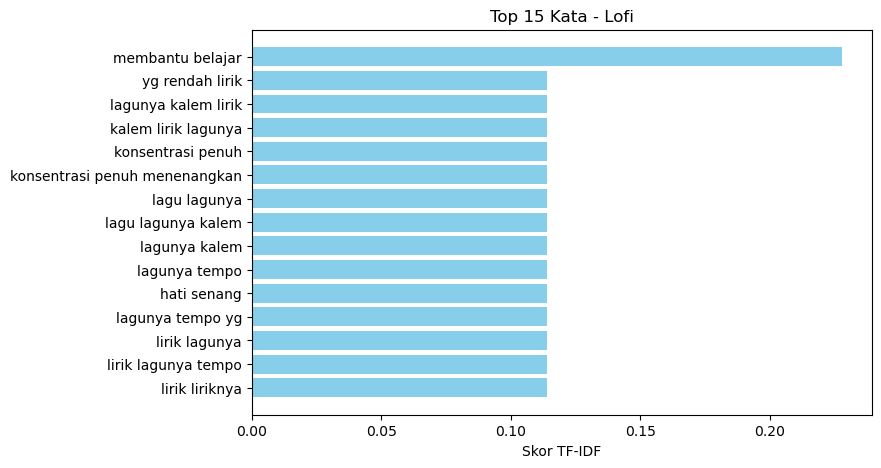

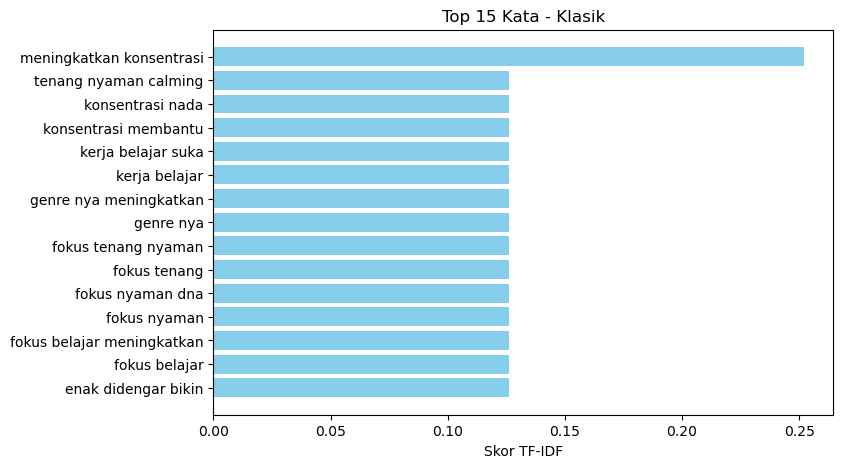

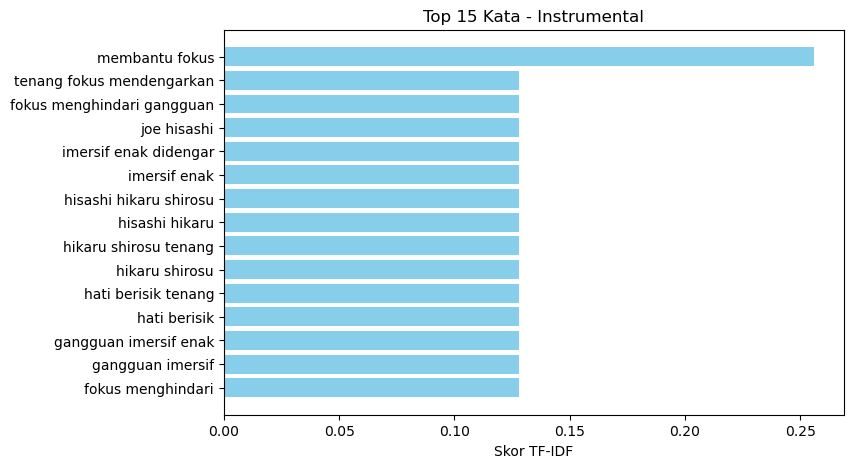

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
for g in top5:
    text = " ".join(df_musik_ya[genre == g]["Mengapa Anda mendengarkan jenis lagu tersebut?"].dropna())
    if not text.strip():
        continue 
    tfidf = TfidfVectorizer(max_features=500, ngram_range=(2,3))
    X_tfidf = tfidf.fit_transform([text])  
    
    mean_scores = np.asarray(X_tfidf.mean(axis=0)).ravel()
    top_idx = mean_scores.argsort()[::-1][:15]
    
    top_words = pd.DataFrame({
        "Kata": tfidf.get_feature_names_out()[top_idx],
        "Skor TF-IDF": mean_scores[top_idx]
    })
    
    plt.figure(figsize=(8,5))
    plt.barh(top_words["Kata"][::-1], top_words["Skor TF-IDF"][::-1], color="skyblue")
    plt.xlabel("Skor TF-IDF")
    plt.title(f"Top 15 Kata - {g}")
    plt.show()

Dari hasil TF-IDF bigram/trigram di atas, dapat diketahui frasa khas dari setiap genre sebagai berikut.
* Pop: "enak didengar", "seru semangat", "belajar tenang"
* Jazz: "jazz melodi tenang", "instrumen relax", "go to cafe"
* Lofi: "membantu belajar", "lagu lagunya kalem", "konsentrasi penuh"
* Klasik: "meningkatkan konsentrasi", "tenang nyaman", "enak didengar"
* Instrumental: "membantu fokus", "fokus menghindari gangguan", "joe hisashi", "hikaru shirosu".

Dapat disimpulkan bahwa:
* Pop dipilih karena meningkatkan mood dan semangat belajar, musiknya terasa enak dan familiar.
* Jazz dipilih karena menciptakan suasana santai, seperti di kafe, membuat belajar lebih rileks dan fokus.
* Lofi dipilih karena efek menenangkan, lirik minim/tidak mengganggu, membantu konsentrasi belajar.
* Klasik dipilih karena membantu fokus dan konsentrasi, menciptakan suasana tenang tanpa distraksi.
* Instrumental dipilih karena tidak ada lirik sehingga minim gangguan, membantu fokus, dan ada preferensi ke komposer tertentu.

## Pengalaman Mendengarkan Musik saat Belajar

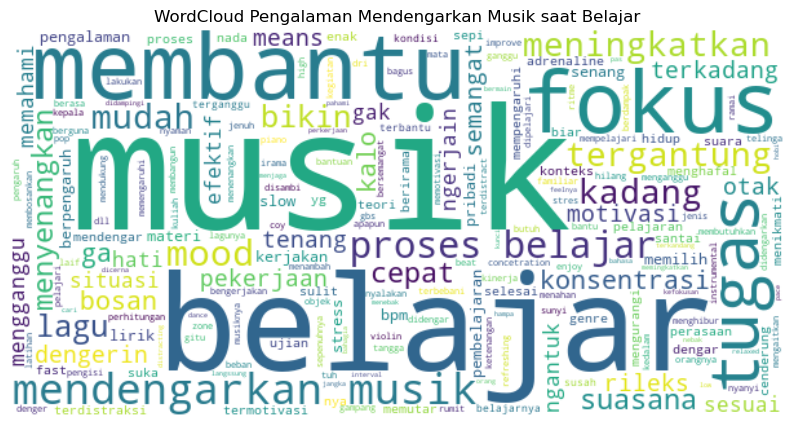

In [50]:
text_komentar = " ".join(df_musik_ya.iloc[:,18].dropna())
wc_komentar = WordCloud(width=600, height=300, background_color="white").generate(text_komentar)
plt.figure(figsize=(10,6))
plt.imshow(wc_komentar, interpolation="bilinear")
plt.axis("off")
plt.title(f"WordCloud Pengalaman Mendengarkan Musik saat Belajar")
plt.show()

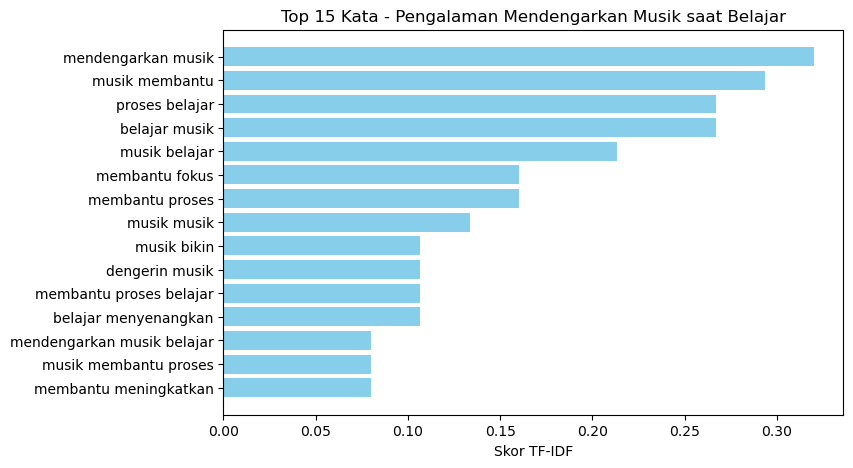

In [49]:
tfidf = TfidfVectorizer(max_features=500, ngram_range=(2,3))
X_tfidf = tfidf.fit_transform([text_komentar])
mean_scores = np.asarray(X_tfidf.mean(axis=0)).ravel()
top_idx = mean_scores.argsort()[::-1][:15]
features = tfidf.get_feature_names_out()

top_words = pd.DataFrame({
    "Kata": [features[i] for i in top_idx],
    "Skor TF-IDF": mean_scores[top_idx]
})

plt.figure(figsize=(8,5))
plt.barh(top_words["Kata"][::-1], top_words["Skor TF-IDF"][::-1], color="skyblue")
plt.xlabel("Skor TF-IDF")
plt.title(f"Top 15 Kata - Pengalaman Mendengarkan Musik saat Belajar")
plt.show()

Wordcloud: musik, belajar, membantu, fokus, tugas, menyenangkan, mood

TF-IDF: "mendengarkan musik", "musik membantu", "proses belajar", "belajar musik", "membantu fokus", "belajar menyenangkan"

Dari hasil wordcloud dan TF-IDF terlihat bahwa musik dipandang sebagai pendukung aktivitas belajar. Kata dan frasa yang muncul menekankan peran musik dalam membantu fokus, menunjang proses belajar, serta membuat suasana belajar menjadi lebih menyenangkan dan meningkatkan mood.

# Kesimpulan

Berdasarkan survei terhadap 129 mahasiswa B27 BINUS University yang mendengarkan musik saat belajar, diperoleh bahwa genre yang paling dominan adalah Pop, Lofi, Jazz, Klasik, dan Instrumental. Analisis deskriptif melalui frekuensi, Wordcloud, dan TF-IDF memperlihatkan bahwa musik sering dianggap membantu dalam belajar:
* Pop berfungsi sebagai penambah semangat
* Lofi dan Jazz menciptakan suasana santai
* Klasik meningkatkan konsentrasi
* Instrumental dinilai minim distraksi.
Responden juga menekankan bahwa musik membuat belajar terasa lebih menyenangkan serta memperbaiki suasana hati.

Namun, hasil uji statistik menunjukkan bahwa tidak terdapat hubungan signifikan antara genre musik yang dipilih dengan tingkat konsentrasi belajar mahasiswa. Hal ini berarti bahwa meskipun secara subjektif musik dianggap mendukung fokus dan konsentrasi, preferensi terhadap genre tertentu tidak terbukti secara kuantitatif memengaruhi konsentrasi belajar.

Dengan demikian, analisis ini menyimpulkan bahwa musik secara umum dipandang sebagai faktor pendukung proses belajar, tetapi jenis atau genre musik tidak memiliki korelasi langsung dengan konsentrasi belajar mahasiswa.